<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 Maximum Likelihood Estimation**


*   MLE for Random Samples
*   Linear Regression



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# **MLE for Random Samples**


Let $X_1, X_2, X_3,...,X_n$ have joint pmf or pdf, such that:

$f(x_1, x_2, x_3,...,x_n;\theta_1,...\theta_m)$

where $\theta_1,...\theta_m$ have unknown values. When $x_1...x_n$ are sample values, the above function is the likelihood function. The maximium likelihood estimates (mle's) $\hat{\theta_1}...\hat{\theta_m}$ are the values that maximize the likelihood function.

If $X_1, X_2, X_3,...,X_n$ is a random sample from a *normal* distribution, then the likelihood function is:

$f(x_1,...x_n;\mu,σ^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x_1-\mu)^2}{(2σ^2)}...\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x_n-\mu)^2}{(2σ^2)} = (\frac{1}{2\pi\sigma^2})^{n/2}e^{\frac{-Σ(x_i-\mu)^2}{2\sigma^2}}$

Taking natural log of both sides, we can manipulate the condition such that:

$ln[f(x_1,...x_n;\mu,σ^2)] = -\frac{n}{2}ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}Σ(x_i-\mu)^2$

As we seek to maximize μ and $\sigma^2$, we take the partial derivative of the function with respect to μ and $\sigma^2$ and set them to zero. We start with μ:

$\frac{∂ln(f)}{∂\mu} = -\frac{1}{\sigma^2}Σ(x_i-μ) = 0 → \hat{\mu} = \frac{1}{n}\Sigma{x_i}$

To estimate $\hat{\sigma^2}$:

$\frac{∂ln(f)}{∂\sigma^2} = -\frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\Sigma{(x_i-\mu)^2} = 0 → \sigma^2=\frac{\Sigma(x_i-\mu)^2}{n}$

We have derived our MLE's for μ and $\sigma^2$:

$\hat{\mu} = \frac{1}{n}\Sigma{x_i} = \bar{X}, \sigma^2=\frac{\Sigma(x_i-\mu)^2}{n} = \frac{\Sigma(X_i-\bar{X})^2}{n}$


To demonstrate MLE, we define a true μ, σ, and *n* to construct sample data in the form of a normal distribution:

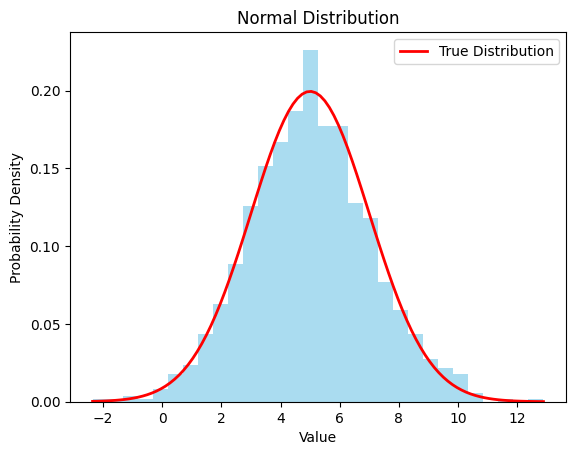

In [4]:
true_mean = 5
true_std = 2
sample_size = 1000
data = np.random.normal(true_mean, true_std, sample_size)

x = np.linspace(min(data), max(data), 100)
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.plot(x, norm.pdf(x, true_mean, true_std), 'r-', lw=2, label='True Distribution')
plt.legend()
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

We can derive the MLE's from our normal distribution:

MLE Estimate of Mean: 5.011
MLE Estimate of Standard Deviation: 2.08
Difference between MLE Mean and True Mean: 0.01129
Difference between MLE Standard Deviation and True Standard Deviation: 0.08033


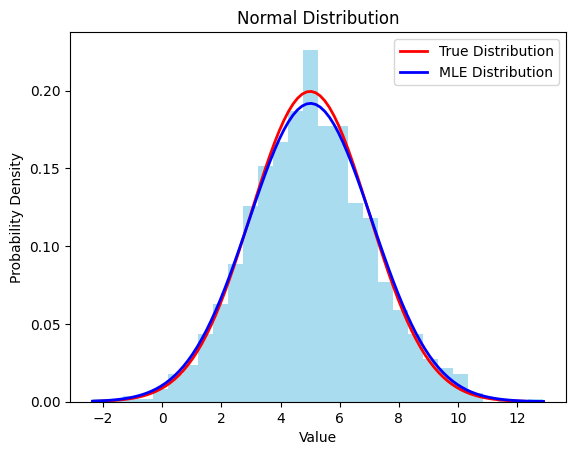

In [10]:
# Calculate MLE estimates
sample_mean = np.mean(data)
sample_variance = np.sum((data - sample_mean)**2) / len(data)
sample_std = np.sqrt(sample_variance)

# Print the results
print("MLE Estimate of Mean:", round(sample_mean, 3))
print("MLE Estimate of Standard Deviation:", round(sample_std, 3))

# Calculate the differences
mean_diff = sample_mean - true_mean
std_diff = sample_std - true_std

# Print the differences
print("Difference between MLE Mean and True Mean:", round(mean_diff, 5))
print("Difference between MLE Standard Deviation and True Standard Deviation:", round(std_diff, 5))

# Generate x-values for the plots
x = np.linspace(min(data), max(data), 100)

# Plot the distributions
plt.plot(x, norm.pdf(x, true_mean, true_std), 'r-', lw=2, label='True Distribution')
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.plot(x, norm.pdf(x, sample_mean, sample_std), 'b-', lw=2, label='MLE Distribution')

plt.legend()
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

# **Linear Regression**

Given data points, we seek to establish a "best fit" to the data. This generally means finding coefficients $β_p$'s in the equation:

$\hat{y} = {β_0}+{β_1}x_{i1}+...+{β_p}x_{ip}$

that minimize residual error (difference between estimate and true value).

We can utilize MLE to perform a linear regression.

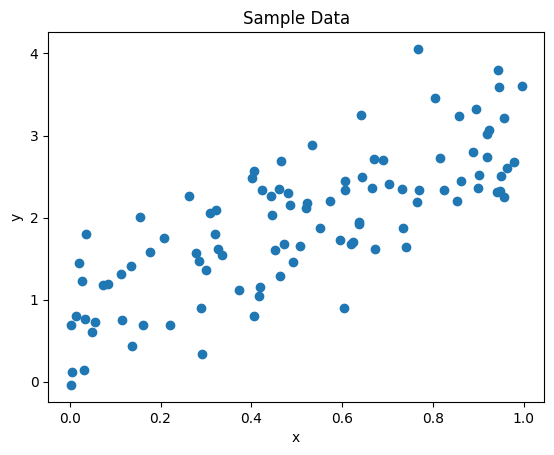

In [44]:
#Generating sample data
np.random.seed(12)
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100) * 0.5
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Data')
plt.show()

Estimated slope: 2.225661331767939
Estimated intercept: 0.8072555223253928


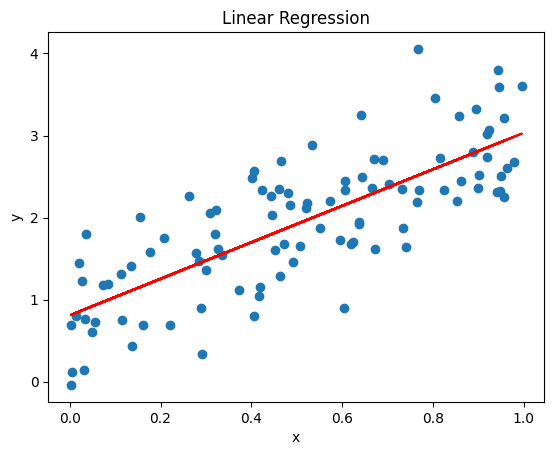

Residual: 5.3639774916922285
R-squared:  0.6089496294439738


In [49]:
#MLE estimation
sample_mean_x = np.mean(x)
sample_mean_y = np.mean(y)
sample_variance_x = np.sum((x - sample_mean_x)**2) / len(x)

covariance = np.sum((x - sample_mean_x) * (y - sample_mean_y)) / len(x)

#estimate slope and intercept
estimated_slope = covariance / sample_variance_x
estimated_intercept = sample_mean_y - estimated_slope * sample_mean_x

print("Estimated slope:", estimated_slope)
print("Estimated intercept:", estimated_intercept)
plt.scatter(x, y)
plt.plot(x, estimated_intercept + estimated_slope * x, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()
residuals = y - (estimated_intercept + estimated_slope * x)
print("Residual:", np.linalg.norm(residuals))
print("R-squared: ", 1 - np.var(residuals)/np.var(y))